In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

### 3.4 Dimensionality Reduction, Feature Extraction and Manifold Learning
- Principal Component Analysis (PCA)
  - 가장 간단하고 흔히 사용하는 대표적인 기법
- Non-negative matrix factorization (NMF)
  - 특성 추출에 널리 사용
- t-distributed stochastic neighbor embedding (t-SNE)
  - 2차원 산점도를 이용해 시각화 용도로 많이 활용

#### 3.4.1 Principal Component Analysis (PCA)

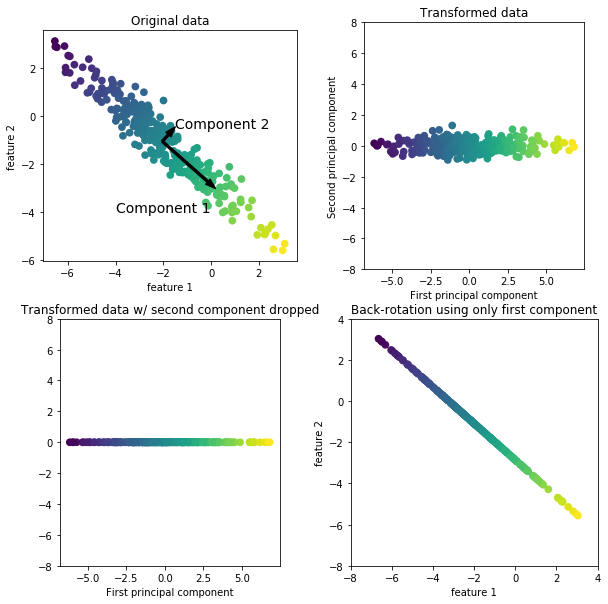

In [2]:
mglearn.plots.plot_pca_illustration()

- 그래프 1
  - 성분 1: 원본 데이터에서 분산이 가장 큰 벡터 (원본 데이터에서 가장 많은 정보를 담고 있음)
  - 성분 2: 성분 1 벡터와 직각인 방향 중 분간이 가장 큰 벡터
    - 2차원에서는 성분 1 벡터와 직각인 벡터가 1개만 존재
    - 고차원에서는 여러개의 직각 벡터 존재 가능
  - 위와 같은 방법을 거쳐 찾은 두 개의 성분 1, 2를 주성분(Principal Component)라고 함
- 그래프 2
  - 주성분 1과 주성분 2를 각각 x축과 y축에 나란하도록 회전한 그림
  - 회전하기 전에 각 특성값에서 평균을 빼서 중심을 원점에 맞추었음
- 그래프 3
  - 주성분 1만 남기는 차원 축소 (Dimensionality Reduction) 수행 결과
  - 2차원 원본 데이터가 1차원 데이터로 변환됨
- 그래프 4
  - 주성분 1 벡터를 원래의 특성 공간으로 다시 옮김
  - 최종적으로 원본 데이터에서 노이즈를 제거하고 좀 더 나은 데이터 시각화 제공

In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [4]:
v = np.cov(a)
print(v)

[[1. 1.]
 [1. 1.]]


In [5]:
from numpy import linalg as la
e = la.eig(v)
print(e[0])
print(e[1])

[2. 0.]
[[ 0.707 -0.707]
 [ 0.707  0.707]]


##### Applying PCA to the cancer dataset for visualization
- 유방함 데이터의 특성값의 개수는 30개
- 30개의 특성들에 대한 산점도 그래프를 그리면 총 435개의 산점도가 산출됨
  - $_{30}C_2 = \displaystyle \frac{30!}{2!28!} = \displaystyle \frac{30 \times 29}{2}=15 \times 29 = 435$
- 이렇게 데이터 특성 개수가 많을 때 (데이터 차원이 높을때) 보다 더 쉽게 특성 데이터들을 시각화 하는 방법
  - 악성(Malignant)와 양성(Benign)에 대해 30개 특성의 히스토그램을 그리는 것 

(426, 30)
(426,)

(143, 30)
(143,)
cancer.data.shape: (569, 30)


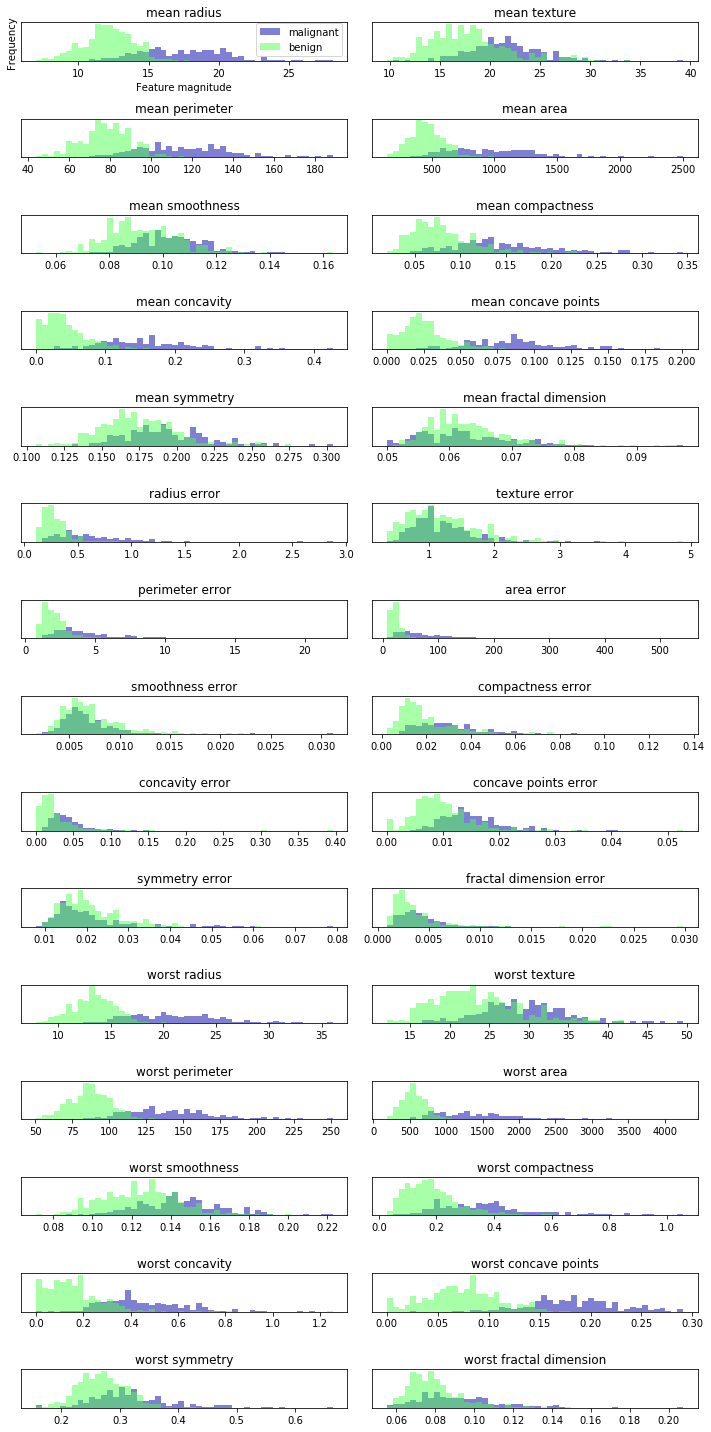

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)
print("cancer.data.shape: {}".format(cancer.data.shape))

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

- 위 그래프에서 다음 두 개의 특성 주목
  - smoothness error: 두 히스토그램이 겹쳐서 별로 쓸모 없는 특성임
  - worst concave points: 두 히스토그램이 확실이 구분되어 매우 유용한 특성임
  
  - PCA 적용전에 StandardScaler를 사용하여 각 특성마다 특성값들의 분산이 1이 되도록 스케일링

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print("X_scaled.shape: {}".format(X_scaled.shape))

X_scaled.shape: (569, 30)


- PCA 
  - n_components: 차원 축소의 결과로 남게될 차원의 개수
    - 기본 값: 원본 데이터의 차원과 동일. 즉, 데이터를 회전만 시키고 모든 주성분을 원본 데이터 그대로 유지

In [8]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

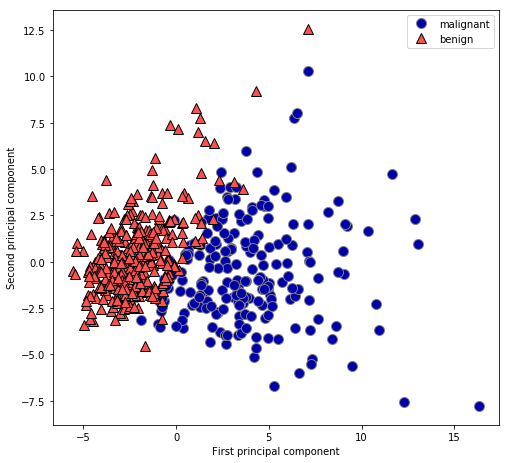

In [9]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 첫번째 주성분과 두번째 주성분을 사용하여 구성한 산점도
  - 두 개의 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 확인
  - 악성 데이터가 양성 데이터보다 더 넓은 구역에 분포함을 알 수 있음
- 산출된 주성분은 원본 데이터에 있는 해당 주성분 방향에 대응하는 여러 특성이 조합된 형태
  - components_  변수
    - 주성분이 담겨 있음

In [10]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [11]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0,0.5,'Principal components')

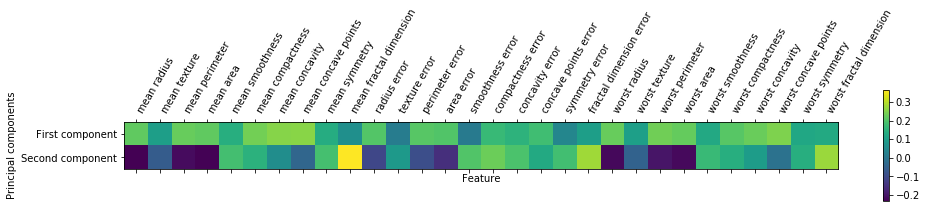

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print("X_scaled.shape: {}".format(X_scaled.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_scaled.shape: (569, 30)
Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_pca.shape: (569, 2)
Accuracy on training set: 1.000
Accuracy on test set: 0.944


- explained_variance_ratio
  - Percentage of variance explained by each of the selected components.
  - 주성분들을 활용하여 원본 데이터에 대하여 설명할 수 있는 분산의 정도
  - 자동으로 주성분 개수가 결정

7
[0.443 0.19  0.094 0.066 0.055 0.04  0.023]
0.9100953006967307


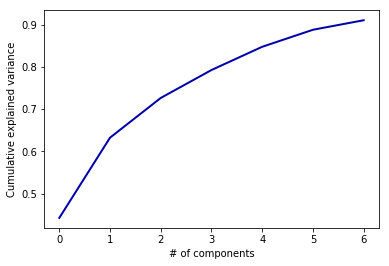

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=0.90)
pca.fit(X_scaled)

print(pca.n_components_)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [16]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

X_pca.shape: (569, 7)
Accuracy on training set: 1.000
Accuracy on test set: 0.951


##### Eigenfaces for feature extraction
- PCA를 사용한 특성 추출
  - 원본 데이터 표현보다 분석하기에 더 적합한 데이터 표현을 찾을 수 있으리라는 생각에서 출발<br/><br/>

- 얼굴 이미지에서 주요 특성 추출하는 응용 제작
  - LFW (Labled Faces in the Wild) 데이터셋 활용
    - 인터넷에서 Crawling한 유명 인사(2000년 초반 이후의 정치인, 가수, 배우, 운동선수)들의 얼굴 이미지
    - 처리 속도를 높이기 위해 흑백 이미지를 사용하고 스케일을 줄임
      - fetch_lfw_people 함수 사용
      - 인자
        - color=False (기본값)
          - color가 True이면 3 RGB channels 값 유지          
        - resize=0.5 (기본값)
        - min_faces_per_person=None (기본값)
          - 각 사람 얼굴당 최소한의 이미지 개수를 지정
    - 출처: 메사추세츠 애머스트 주립대학의 Vision Lab (http://vis-www.cs.umass.edu/lfw/)

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape))
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names)))
print()
print("people.data.shape: {}".format(people.data.shape))
print("people.target.shape: {}".format(people.target.shape))
print()
print("people.target[0]: {}".format(people.target[0]))
print("people.target_names[0]: {}".format(people.target_names[0]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

people.images.shape: (67, 87, 65)
An image shape: (87, 65)
Number of classes: 2

people.data.shape: (67, 5655)
people.target.shape: (67,)

people.target[0]: 0
people.target_names[0]: Gloria Macapagal Arroyo


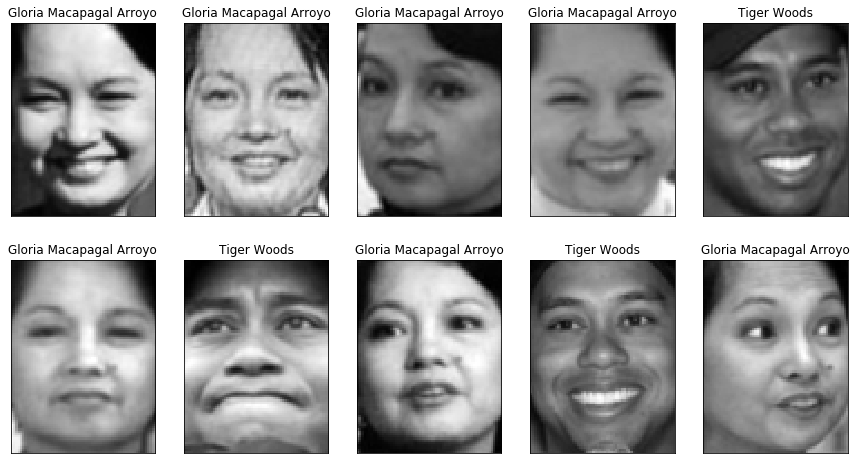

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [21]:
# count how often each target appears
counts = np.bincount(people.target)
print(counts)
print()
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i, name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

[44 23]

[ 0] Gloria Macapagal Arroyo  44   [ 1] Tiger Woods              23   

In [22]:
print("people.target.shape:", people.target.shape)
print()
mask = np.zeros(people.target.shape, dtype=np.bool)

print("mask.shape:", mask.shape)
print()

print("np.unique(people.target):\n{0}".format(np.unique(people.target)))
print()

for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 값을 0~1 사이의 값으로 변환 --> 그레이 스케일로 변환
X_people = X_people / 255.

people.target.shape: (67,)

mask.shape: (67,)

np.unique(people.target):
[0 1]

np.where(people.target == 0):
(array([ 0,  1,  2,  3,  5,  7,  9, 10, 12, 13, 15, 17, 18, 19, 21, 23, 24,
       26, 28, 29, 30, 31, 33, 36, 37, 38, 39, 41, 42, 45, 46, 47, 49, 50,
       51, 53, 54, 56, 58, 59, 60, 62, 63, 65], dtype=int64),)

np.where(people.target == 1):
(array([ 4,  6,  8, 11, 14, 16, 20, 22, 25, 27, 32, 34, 35, 40, 43, 44, 48,
       52, 55, 57, 61, 64, 66], dtype=int64),)



In [23]:
print("X_people.shape:", X_people.shape)
print("y_people.shape:", y_people.shape)

X_people.shape: (67, 5655)
y_people.shape: (67,)


- 얼굴 분류 문제의 어려운점
  - 대표적인 Supervised Learning
  - 일반적으로 얼굴 데이터베이스에는 사람의 수는 매우 많지만 각 사람에 대한 이미지 수는 적음 (즉, 클래스별 훈련 데이터가 작음)
  - 대규모 모델을 처음부터 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가하여 모델을 강화시킬 수 있어야 함
- KNeighborsClassifier
  - 위와 같은 문제가 존재할 때 가장 쉽게 사용할 수 있는 모델
  - n_neighbors=1
    - 클래스마다 하나의 최근접 훈련 샘플만 사용

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# split the data in training and test set
# stratify parameter makes a split so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
# train_test_split은 훈련 데이터와 테스트 데이터를 기본적으로 75%:25%로 나눔

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

X_train.shape: (50, 5655)
y_train.shape: (50,)
X_test.shape: (17, 5655)
y_test.shape: (17,)
Test set score of 1-nn: 0.94


- 0.23의 분류 정확도
  - 나쁜 결과는 아님
    - 무작위 분류 정확도는 1/62 = 1.6%
  - 좋은 결과도 아님
    - 두 이미지의 동일 위치 픽셀의 거리 비교 기반 --> 실제적으로 얼굴이미지를 인식하는 것과 다름
    - 동일한 두 사람 얼굴에 대해 얼굴위치가 한 픽셀만 오른쪽으로 이동해도 전혀 다른 얼굴 이미지로 인식 

- PCA with Whitening (백색화)
  - 인자: whiten=True
    - 각 주성분마다 특성값들의 스케일을 동일하게 함
    - 즉, PCA 변환 결과 각 주성분 마다 데이터 특성들이 평균이 0, 표준편차가 1이 되도록 변환
  - 일반적인 PCA 결과 데이터에 대하여 StandardScaler 적용하는 것과 동일한 효과

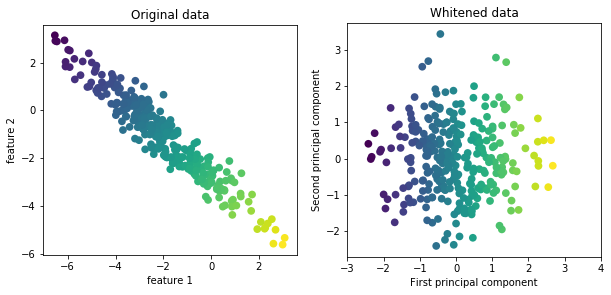

In [25]:
mglearn.plots.plot_pca_whitening()

- PCA를 이용하여 처음 원본 데이터의 5655개의 특성 종류에서 100개의 주성분을 추출 (pca.components_)
- 추출한 주성분을 활용하여 원본 데이터를 변환 
    - 주성분 행렬(100, 5655) X 원본 샘플(5655,) = 새로운 특성데이터(100,)

In [26]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (50, 50)


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.41


In [28]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (50, 5655)


- 하지만, 활용하는 분류 모델에 따라 PCA를 활용한 예측 정확도는 달라짐
- 일반적으로 PCA로 변환된 더 낮은 차원의 데이터를 활용하면 예측 정확도는 다소 낮아짐

In [29]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state=0)
lr1.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(lr1.score(X_test, y_test)))

lr2 = LogisticRegression(random_state=0)
lr2.fit(X_train_pca, y_train)

print("Accuracy on test set: {:.3f}".format(lr2.score(X_test_pca, y_test)))

Accuracy on test set: 1.00
Accuracy on test set: 0.706


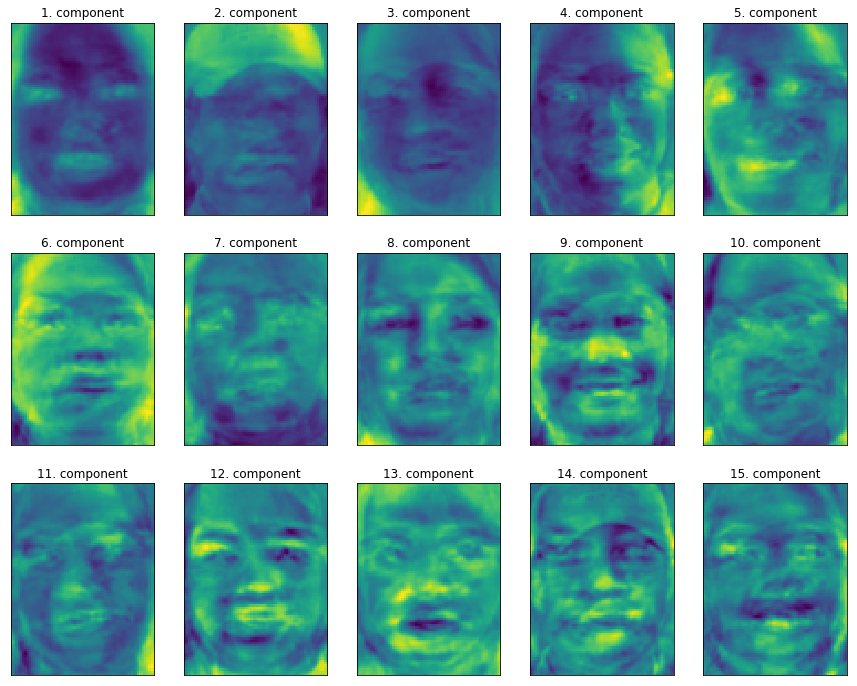

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [31]:
- 주성분 1: 얼굴과 배경의 명암 차이를 기록한 것으로 추정
- 주성분 2: 오른쪽과 왼쪽의 명암 차이를 담고 있는 것으로 추정
- ...
- 주성분을 사용하여 원본 데이터를 재구성
  - 주성분 행렬(100, 5655) X 원본 샘플(5655,) = 새로운 특성데이터(100,)
  - 주성분의 전치행렬(5666, 100) X 새로운 특성데이터(100,) = 원본 샘플(5666,)

SyntaxError: invalid syntax (<ipython-input-31-42b416b44bc6>, line 1)

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.103268, ..., 0.05098 ],
       ...,
       [0.039216, ..., 0.376471]], dtype=float32), 
array([[0.122876, ..., 0.260131],
       ...,
       [0.145098, ..., 0.95817 ]], dtype=float32))
________________________________________________________pca_faces - 0.0s, 0.0min


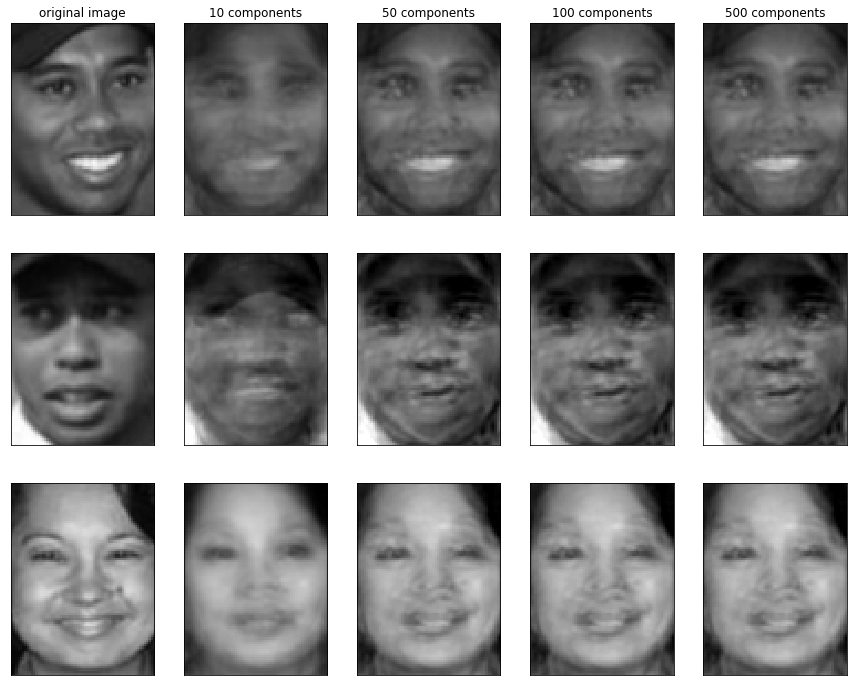

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'Second principal component')

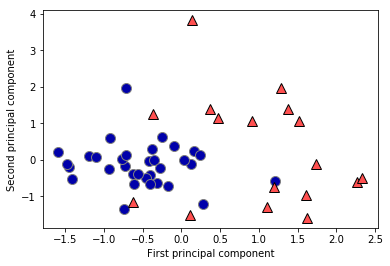

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")